<a href="https://colab.research.google.com/github/igor-stefan/metodos_numericos_2019/blob/master/projeto_interpolacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descrição
<p align='justify'>No <a href="https://colab.research.google.com/drive/1XaF7641mgKhXOAmDM7c5U4BPhSTl85u8">projeto</a> sobre raízes da disciplina de métodos numéricos, foi analisado o valor da razão $\frac {R_s}{R_o}$ do sensor MQ135, quando a concentração de CO2 no ambiente estava em níveis normais. Naquela ocasião, foi utilizada uma regressão realizada pelo software Excell.</p>
<p align='justify'>O objetivo desse projeto é realizar a interpolação dos pontos presentes no datasheet do MQ135, referentes à razão $\frac {R_s}{R_o}$ e  ao respectivo valor correspondente em $ppm$, utilizando os métodos: <b>Direto, Newton, Lagrange e Splines quadrática</b> e comparar o resultado com o obtido no projeto anterior para o mesmo nível de concentração. </p>
<p align='center'>Imagem da regressão da função polinomial encontrada pelo Excell.</p>
<p align='center'>
<img src="https://i.ibb.co/Wy96T6L/regressao-polinomial-mq135.png" alt="regressao-polinomial-mq135" style="width:10px;height:10px;"
</p>

<p align='justify'>O valor de <b>x</b> para que <b>y</b> estivesse em níveis normais foi $x=-3.2889$ </p>

#Tabela de valores
<p align='justify'>Para iniciar a interpolação é necessário uma tabela com pares de pontos correspondentes, retirados do gráfico da imagem abaixo. Esta foi a tabela utilizada para obter o gráfico mostrado acima no Excell e será utilizada para fazer a interpolação dos pontos, sendo <b>x</b> os valores da razão $\frac {R_s}{R_o}$ e <b>y</b> os valores em $ppm$.</p>
 
<p align='center'>
<img src="https://i.ibb.co/GW3V9nY/curva-mq135.png" alt="curva-mq135" style="width:20;height:20px;border:0;">
</p>

Rs/Ro | ppm
--- | ---
2.4 | 10
1.9 | 20
1.6 | 30
1.5 | 40
1.4 | 50
1.3 | 60
1.25 | 70
1.22 | 80
1.17 | 90
1.12 | 100
0.8 | 200



#Implementação
Será realizado, abaixo, a implementaçao das funções que farão a interpolação, além de serem criados os vetores x e y contendo os pontos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def newton(x,val_x,val_y,m):
  coeficientes = np.zeros(val_x.shape[0])
  m_val=np.zeros((val_x.shape[0],val_x.shape[0]),dtype=float)
  m_controle=np.zeros((val_x.shape[0],val_x.shape[0]),dtype=bool)
  res=0;
  diferenca=1;
  for i in range (coeficientes.shape[0]):
    coeficientes[i]=pd(0,i,m_val,m_controle,val_x,val_y)
    res+=diferenca*coeficientes[i]
    diferenca*=x-val_x[i]
  print('f(',x,') = ', res,sep='')
  if m:
    print('Coeficientes = ',coeficientes);
  return res;

def pd(inicio,fim,m_val,m_controle,val_x,val_y):
  if m_controle[inicio,fim]:
    return m_val[inicio,fim] 
  if(inicio==fim):
    return val_y[inicio] 
  m_val[inicio,fim]=(pd(inicio+1,fim,m_val,m_controle,val_x,val_y)-pd(inicio,fim-1,m_val,m_controle,val_x,val_y))/(val_x[fim]-val_x[inicio])
  m_controle[inicio,fim]=1
  return m_val[inicio,fim];


def lagrange(x,val_x,val_y,m):
  for i in range(val_x.shape[0]):
    if val_x[i]==x:
      return val_y[i]
  
  g=np.zeros((val_x.shape[0],val_x.shape[0])) #matriz G para metodo de lagrange utilizando dispositivo pratico
  gd=1 #produto da diagonal principal
  l=val_y.copy();

  #for para construir a matriz; onde i=j o valor é x-val_x[coluna]; onde i!=j, val_x[linha]-val_x[coluna]
  for i in range(g.shape[0]): 
    for j in range(g.shape[0]): 
      if i!=j:
        g[i,j]=val_x[i]-val_x[j]
      else:
        g[i,j]=x-val_x[j]
        gd*=g[i,j] #atualiza o produto da diagonal principal
  res=0;
  for i in range(g.shape[0]):
    l[i]=gd/np.prod(g[i,:]) #Cada Li(x) recebe o quociente entre o produto da diagonal principal e o produto da respectiva linha i.
    res+=l[i]*val_y[i] #o resultado é a soma de cada Li(x) com o respectivo val_y[x](ou valor de f(xi))

  print('f(',x,') = ',res)
  if m:
    print('Coeficientes = ', l)
  return res

def pivotamento(matriz):
  for i in range(matriz.shape[0]):
    maior_abs=np.abs(matriz[i,i])
    maior=matriz[i,i]
    for q in range(i+1,matriz.shape[0]): 
      if(np.abs(matriz[q,i])>maior_abs): 
        maior=matriz[q,i] 
        matriz[[i,q]]=matriz[[q,i]] 
    pivo=maior 
    equacao_pivo=matriz[i,:] 
    j=i+1 
    while(j<matriz.shape[0]): 
      eliminador=matriz[j,i]/pivo 
      matriz[j,:]=matriz[j,:]-(eliminador*equacao_pivo) 
      j=j+1 
  return matriz 

def substituicao(matriz):
  solucoes=np.zeros(matriz.shape[0],dtype=float) 
  solucoes[-1]=matriz[-1,-1]/matriz[-1,-2] 
  soma=0
  for i in range(-(matriz.shape[0]-2),1): 
    for j in range(matriz.shape[0]): 
      if(j!=-i): 
        soma+=solucoes[j]*matriz[-i,j] 
    solucoes[-i]=(matriz[-i,-1]-soma)/matriz[-i,-i] 
    soma=0 
  return solucoes 

def gauss_pivotamento(matriz_sistema):
  return substituicao(pivotamento(matriz_sistema))

def direto(x,val_x,val_y,p):
  m=np.zeros((val_x.shape[0],val_x.shape[0]+1)) #preenche-se uma matriz de zeros
  m[:,-1]=val_y.copy()#ultima coluna recebe os valores de y
  for i in range(val_x.shape[0]):
    for j in range(val_x.shape[0]):
      m[i,j]=val_x[i]**j #x^n+x^n-1+x^n-2+...+x^2+x+0 = y
  coeficientes=gauss_pivotamento(m) #resolvo o sistema
  res=0
  for k in range(len(coeficientes)):
    res+=coeficientes[k]*x**k
  print('f(',x,') = ', res,sep='')
  if p:
    print('Coeficientes = ', coeficientes)
  return res

#nome da função em referência ao amigo Rafael que ajudou a mim e outros colegas a entender o padrão de preenchimento da matriz no metodo splines.
def rafael_matriz_splines(val_x,val_y):
  matriz=np.zeros((3*(val_x.shape[0]-1),3*(val_x.shape[0]-1)+1)) #numero de linhas e colunas da matriz
  num_pol=val_x.shape[0]-1 #numero de polinomios para n pontos é n-1.

  for i in range(matriz.shape[0]):
    if i<2*num_pol: #até a linha equivalente a 2 vezes o numero de polinomios, a ultima coluna recebe os valores de f(x)
      ind=i//2 #padrão para colocar os indices do vetor dos dos valores de x.
      if i%2:
        #se a linha for impar
        matriz[i,ind]=val_x[ind+1]**2
        matriz[i,ind+num_pol]=val_x[ind+1]
        matriz[i,ind+2*num_pol]=1
      else:
        #se for par
        matriz[i,ind]=val_x[ind]**2
        matriz[i,ind+num_pol]=val_x[ind]
        matriz[i,ind+2*num_pol]=1
      matriz[i,-1]=val_y[(1+i)//2] #colocando os valores de f(x)
    elif i<(matriz.shape[0]-1):
      #preenchendo as condições das derivadas
      matriz[i,i-2*num_pol]=2*val_x[i+1-2*num_pol]
      matriz[i,i+1-2*num_pol]=-2*val_x[i+1-2*num_pol]
      matriz[i,i-num_pol]=1
      matriz[i,i+1-num_pol]=-1
    else:
      #a1=0
      matriz[i,0]=1
  return matriz;


#ms = matriz spline preenchida
def solucao_sistema(ms):
  a=ms[:,:-1].copy(); #separa a matriz dos coeficientes
  b=ms[:,-1].copy(); #matriz dos valores
  return np.linalg.solve(a,b)


#ssms = solução sistema matriz splines
#val_x = valores de x da tabela
#x = ponto intermediario que deseja encontrar f(x)

def polinomio_splines(x,val_x,ssms):
  k=val_x.shape[0]-1 #k é o numero de polinomios splines
  for j in range (k):
    if x<=val_x[j+1]: #se x está dentro do intervalo
      return ssms[j]*x**2+ssms[j+k]*x+ssms[j+k*2] #retorna o valor splines de x, da forma ax^2+bx+c

def splines(x,val_x,val_y,m):
  k=rafael_matriz_splines(val_x,val_y)
  k1=solucao_sistema(k)
  k2=polinomio_splines(x,val_x,k1)
  if m:
    print('f(',x,') = ',k2,sep='')
  return k2;

def plotar_grafico(x1,x2,i,f):
  intervalo=[] #cria um vetor para intervalo
  y=[] #cria um vetor para receber os valores de f(x)
  intervalo = np.arange(x1,x2,i); #associa o intervalo ao vetor
  for j in intervalo: #itera j no intervalo
    y.append(f(j)); #adiciona em y os valores calculados de f(j)
  plt.plot(intervalo,y); #plota o grafico x,y
  plt.grid(1); 
  plt.show();

x=np.array([.8,1.12,1.17,1.22,1.25,1.3,1.4,1.5,1.6,1.9,2.4],dtype=float)
y=np.array([200,100,90,80,70,60,50,40,30,20,10],dtype=float)

#Interpolação pelo método direto
<p align='justify'>Será realizada a interpolação pelo método direto utilizando o valor $x=-3.2889$. Em seguida será plotado um gráfico dos valores de $x$ e $y$, $-2<=x<=3.5$ e o gráfico da função encontrada com a regressão para o mesmo intervalo. São mostrados os valores dos coeficientes e os $f(x)$'s calculados.</p> 

f(-3.2889) = -182396263428905.3
Coeficientes =  [-8.80644200e+08  6.61606701e+09 -2.21597099e+10  4.35859931e+10
 -5.57607106e+10  4.84853795e+10 -2.90190485e+10  1.18035600e+10
 -3.12216898e+09  4.84839036e+08 -3.35548851e+07]
-182396263428905.3
f(-2.0) = -7345090909130.879
f(-1.95) = -6332539799019.431
f(-1.9) = -5447222629803.742
f(-1.8499999999999999) = -4674744232922.845
f(-1.7999999999999998) = -4002153134010.9854
f(-1.7499999999999998) = -3417815811149.1533
f(-1.6999999999999997) = -2911300201175.0923
f(-1.6499999999999997) = -2473267902591.511
f(-1.5999999999999996) = -2095374548609.6365
f(-1.5499999999999996) = -1770177848096.893
f(-1.4999999999999996) = -1491052815675.302
f(-1.4499999999999995) = -1252113734953.0046
f(-1.3999999999999995) = -1048142420877.042
f(-1.3499999999999994) = -874522368483.0526
f(-1.2999999999999994) = -727178395898.7772
f(-1.2499999999999993) = -602521409345.0703
f(-1.1999999999999993) = -497397937082.4035
f(-1.1499999999999992) = -409044097784.50385

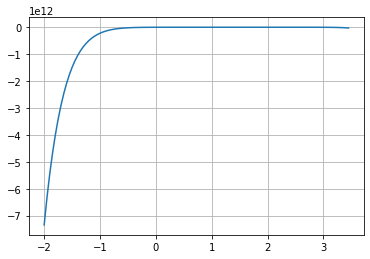

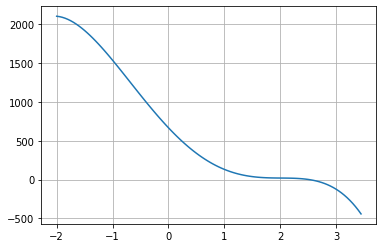

In [ ]:
a=-3.2889
b=direto(a,x,y,1)
print(b)

def h(k):
  return direto(k,x,y,0)

def r(x):
  return -22.72*x**4+60.662*x**3+189.14*x**2-763.51*x+668.15

plotar_grafico(-2,3.5,.05,h)
plotar_grafico(-2,3.5,.05,r)

#Interpolação pelo método de Newton

<p align='justify'>Será realizada a interpolação pelo método de Newton utilizando o valor $x=-3.2889$. Em seguida será plotado um gráfico dos valores de $x$ e $y$, $-2<=x<=3.5$ e o gráfico da função encontrada com a regressão para o mesmo intervalo. São mostrados os valores dos coeficientes e os $f(x)$'s calculados.</p> 

f(-3.2889) = -182357725784617.0
Coeficientes =  [ 2.00000000e+02 -3.12500000e+02  3.04054054e+02 -7.23938224e+02
 -2.68812769e+04  4.81112981e+05 -2.88109618e+06  1.04686032e+07
 -2.73878766e+07  3.98931052e+07 -3.35477152e+07]
-182357725784617.0
f(-2.0) = -7343545769263.768
f(-1.95) = -6331207981450.263
f(-1.9) = -5446077288554.521
f(-1.8499999999999999) = -4673761564005.4
f(-1.7999999999999998) = -4001312069872.8013
f(-1.7499999999999998) = -3417097741773.7217
f(-1.6999999999999997) = -2910688719873.3203
f(-1.6499999999999997) = -2472748574637.9854
f(-1.5999999999999996) = -2094934700989.4634
f(-1.5499999999999996) = -1769806378735.6216
f(-1.4999999999999996) = -1490740020626.232
f(-1.4499999999999995) = -1251851152113.1226
f(-1.3999999999999995) = -1047922688895.0715
f(-1.3499999999999994) = -874339099610.8354
f(-1.2999999999999994) = -727026061620.5428
f(-1.2499999999999993) = -602395237698.259
f(-1.1999999999999993) = -497293820658.72107
f(-1.1499999999999992) = -408958511470.9587

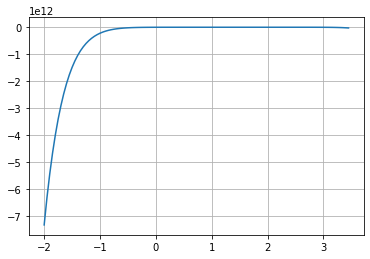

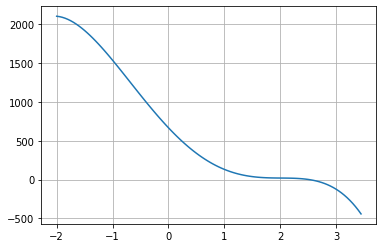

In [ ]:
a=-3.2889
b=newton(a,x,y,1)
print(b)

def h1(k):
  return newton(k,x,y,0)

plotar_grafico(-2,3.5,.05,h1)
plotar_grafico(-2,3.5,.05,r)

#Interpolação pelo método de Lagrange

<p align='justify'>Será realizada a interpolação pelo método de Lagrange utilizando o valor $x=-3.2889$. Em seguida será plotado um gráfico dos valores de $x$ e $y$, $-2<=x<=3.5$ e o gráfico da função encontrada com a regressão para o mesmo intervalo. São mostrados os valores dos coeficientes e os $f(x)$'s calculados.</p> 

f( -3.2889 ) =  -182357725784615.47
Coeficientes =  [ 9.04219421e+08 -2.90644594e+12  1.94614309e+13 -7.00502328e+13
  7.82559811e+13 -2.87651169e+13  5.00085110e+12 -1.15465940e+12
  1.58230722e+11 -9.46096755e+08  3.17670860e+06]
-182357725784615.47
f( -2.0 ) =  -7343545769263.797
f( -1.95 ) =  -6331207981450.309
f( -1.9 ) =  -5446077288554.558
f( -1.8499999999999999 ) =  -4673761564005.389
f( -1.7999999999999998 ) =  -4001312069872.805
f( -1.7499999999999998 ) =  -3417097741773.698
f( -1.6999999999999997 ) =  -2910688719873.304
f( -1.6499999999999997 ) =  -2472748574637.9634
f( -1.5999999999999996 ) =  -2094934700989.461
f( -1.5499999999999996 ) =  -1769806378735.612
f( -1.4999999999999996 ) =  -1490740020626.2192
f( -1.4499999999999995 ) =  -1251851152113.1301
f( -1.3999999999999995 ) =  -1047922688895.0713
f( -1.3499999999999994 ) =  -874339099610.8416
f( -1.2999999999999994 ) =  -727026061620.5333
f( -1.2499999999999993 ) =  -602395237698.2438
f( -1.1999999999999993 ) =  -4972938

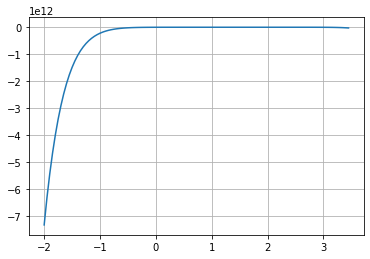

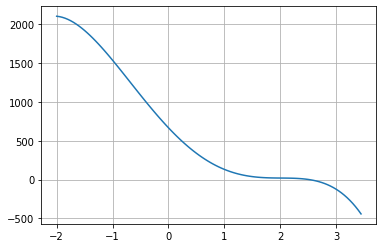

In [ ]:
a=-3.2889
b=lagrange(a,x,y,1)
print(b)

def h2(k):
  return lagrange(k,x,y,0)

plotar_grafico(-2,3.5,.05,h2)
plotar_grafico(-2,3.5,.05,r)

#Interpolação pelo método Splines quadrático

<p align='justify'>Será realizada a interpolação pelo método Splines quadrático utilizando o valor $x=-3.2889$. Em seguida será plotado um gráfico dos valores de $x$ e $y$, $1<=x<=3$ para melhor visualização dos polinômios splines, além do gráfico da função encontrada com a regressão para o mesmo intervalo das interpolações anteriores. São mostrados os valores dos $f(x)$'s calculados. </p> 

f(-3.2889) = 1477.7812500000132
1477.7812500000132
f(1.0) = 137.50000000000045
f(1.05) = 121.87500000000051
f(1.1) = 106.25000000000051
f(1.1500000000000001) = 92.65000000000055
f(1.2000000000000002) = 85.35000000000173
f(1.2500000000000002) = 70.0
f(1.3000000000000003) = 59.999999999999886
f(1.3500000000000003) = 56.35416666666788
f(1.4000000000000004) = 49.99999999999977
f(1.4500000000000004) = 43.64583333333189
f(1.5000000000000004) = 40.00000000000068
f(1.5500000000000005) = 36.35416666666856
f(1.6000000000000005) = 29.999999999999545
f(1.6500000000000006) = 23.29861111110813
f(1.7000000000000006) = 18.61111111110631
f(1.7500000000000007) = 15.937499999994998
f(1.8000000000000007) = 15.27777777777328
f(1.8500000000000008) = 16.631944444441842
f(1.9000000000000008) = 20.000000000000227
f(1.9500000000000008) = 23.837500000003047
f(2.000000000000001) = 26.600000000005366
f(2.0500000000000007) = 28.287500000006844
f(2.100000000000001) = 28.90000000000782
f(2.1500000000000012) = 28.4375

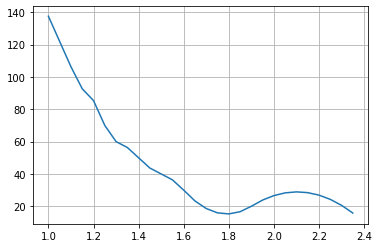

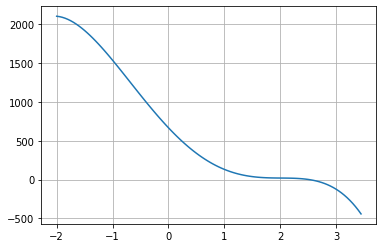

In [ ]:
a=-3.2889
b=splines(a,x,y,1)

print(b)

def h3(k):
  return splines(k,x,y,1)

plotar_grafico(1.0,3.0,.05,h3)
plotar_grafico(-2,3.5,.05,r)

#Conclusão
<p align='justify'>As interpolações realizadas com os 4 métodos apresentam algumas conclusões interessantes.</p> 
<p align='justify'><b>1.</b> É nítido através dos gráficos, que houve uma discrepância nos valores encontrados pelas funções interpoladoras e pela função do Excell. Isso pode ser explicado pelo fato de que:</p>

*  Interpolação não é o melhor método para utilizar na aplicação do sensor MQ135. Por exemplo, o software Excell deve ter usado outro método para encontrar o polinômio de quarto grau.
*  Os valores da tabela são de escala exponencial, perceba a diferença de intervalos em $x$ e $y$ e como aumentam ou diminuem. Neste caso, a função potência é a que melhor se adequa aos valores porém no projeto foi tentada uma adequação desses valores com funções polinomiais, resultando em algo estranho.

<p align='justify'><b>2.</b> Observe que nos três primeiros métodos o resultado foi semelhante, quando $x$ foi um dos valores da tabela, $y$ retornou o respectivo valor, entretanto, quando $x$ foi um valor entre os valores de $x$ da tabela, $y$ retornou um valor muito alto ou muito baixo, e isso se repetiu como um ciclo até a extrapolação dos valores de $x$ presentes na tabela, $x>2.4$ ou $x<0.8$. Então os valores diminuiram cada vez mais, ficando muito pequenos, porém sem uma sequência aparente.</p> 
<p align='justify'> Em uma aplicação real, indicaria que o sensor MQ135 estaria medindo valores aleatórios, e principalmente, errôneos, pois a razão $\frac {R_s}{R_o}$ nunca será negativa, visto que $R_s$ e $R_o$ são sempre positivos. Ainda que fossem utilizados valores negativos na visualização do gráfico a título de curiosidade. Outro ponto é que os valores de $ppm$ não podem ser negativos, pois sempre há presença de CO2, diferentemente do que foi mostrado na visualização do gráfico do <b>polinômio gerado pela interpolação</b>.</p>
<p align='justify'><b>3.</b> Todos os métodos apresentaram coerência na interpolação, porque o resultado dos três primeiros métodos foi aparentemente igual e o método splines apresentou o gráfico esperado.</p>
<p align='justify'><b>4.</b> O método splines foi o que teve a apresentação do gráfico mais agradável, destacando:</p>

* Apresentou apenas valores positivos.
* É possível notar que entre $f(x_0)$ e $f(x_1)$ o spline é uma reta.
* Para valores menores que $f(x_0)$ foram calculados valores baseados na reta, porque para $x<x_0$ não há restrição devido à forma de implementação. Porém não foram calculados valores para $x<x_n$ (2.4), podendo ser observado pelo valor "none" na cédula acima.

<p align='justify'>Entretanto não pode ser utilizado como aplicação para o MQ135 devido à oscilação de valores entre os $f(x)$'s, as vezes crescendo, as vezes decrescendo dentro de um mesmo intervalo entre os $x$'s da tabela, o que é impossível de ocorrer  na realidade. Além de que os valores mais comuns para a razão $\frac {R_s}{R_o}$ são geralmente próximos de 0, que a função spline responde com uma reta, quando na realidade é necessária uma resposta exponencial.</p>

<p align='justify'><b>A principal conclusão:</b> Os polinômios da interpolação respondem bem para valores de $x$ dentro do intervalo que foram interpolados quando o crescimento ou decrescimento dos valores não são exponenciais.</p>
<p align='justify'>Para valores fora do intervalo o polinômio interpolador não respondeu bem. O método spline <b>não</b> responde fora do intervalo.</p>
<p align='justify'><b>Uma opinião:</b> Com este projeto foi possível notar que a interpolação é uma maneira interessante de resolver problemas em que é necessário encontrar um valor desconhecido dentro de um determinado intervalo, no qual já se conhecem alguns pares de pontos $(x,y)$, desde que estes pares de pontos não tenham tanta variação, ou como foi dito, uma resposta exponencial.</p>
<p align='justify'>Além disso, a extrapolação não apresentou bons resultados, talvez em casos que a resposta não seja exponencial, a extrapolação fornecerá um valor condizente com o comportamento do polinômio (crescente ou decrescente) após passar pelo ponto $f(x_n)$ presente na tabela.</p>